In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("Real estate.csv")
df.head(2)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2


In [3]:
df.columns=df.columns.str.replace(' ','_')
df.columns=df.columns.str.lower()
df.shape

(414, 8)

In [4]:
df.columns
df.astype(float)

,no,x1_transaction_date,x2_house_age,x3_distance_to_the_nearest_mrt_station,x4_number_of_convenience_stores,x5_latitude,x6_longitude,y_house_price_of_unit_area
0,1.0,2012.917,32.0,84.87882,10.0,24.98298,121.54024,37.9
1,2.0,2012.917,19.5,306.59470,9.0,24.98034,121.53951,42.2
2,3.0,2013.583,13.3,561.98450,5.0,24.98746,121.54391,47.3
3,4.0,2013.500,13.3,561.98450,5.0,24.98746,121.54391,54.8
4,5.0,2012.833,5.0,390.56840,5.0,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410.0,2013.000,13.7,4082.01500,0.0,24.94155,121.50381,15.4
410,411.0,2012.667,5.6,90.45606,9.0,24.97433,121.54310,50.0
411,412.0,2013.250,18.8,390.96960,7.0,24.97923,121.53986,40.6
412,413.0,2013.000,8.1,104.81010,5.0,24.96674,121.54067,52.5


In [5]:
df.rename(columns={'no':'sno'})

,sno,x1_transaction_date,x2_house_age,x3_distance_to_the_nearest_mrt_station,x4_number_of_convenience_stores,x5_latitude,x6_longitude,y_house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [6]:
df.dtypes

no                                          int64
x1_transaction_date                       float64
x2_house_age                              float64
x3_distance_to_the_nearest_mrt_station    float64
x4_number_of_convenience_stores             int64
x5_latitude                               float64
x6_longitude                              float64
y_house_price_of_unit_area                float64
dtype: object

In [7]:
df['x1_transaction_date']=pd.to_datetime(df['x1_transaction_date'])

In [8]:
df=df.drop(columns=['x1_transaction_date','no'])

In [9]:
df.dtypes

x2_house_age                              float64
x3_distance_to_the_nearest_mrt_station    float64
x4_number_of_convenience_stores             int64
x5_latitude                               float64
x6_longitude                              float64
y_house_price_of_unit_area                float64
dtype: object

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


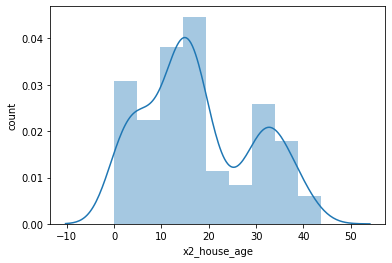

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


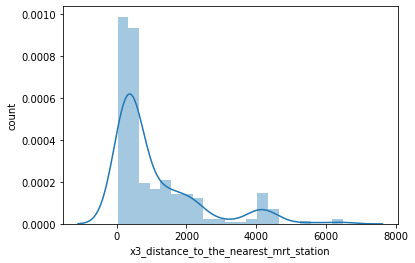

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


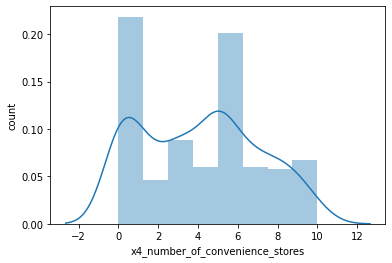

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


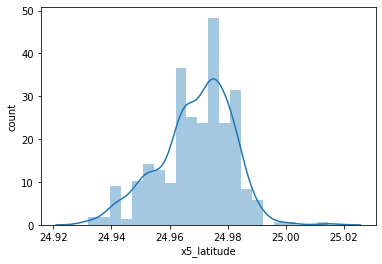

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


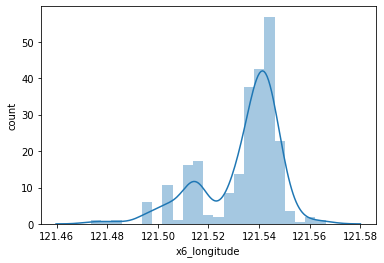

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


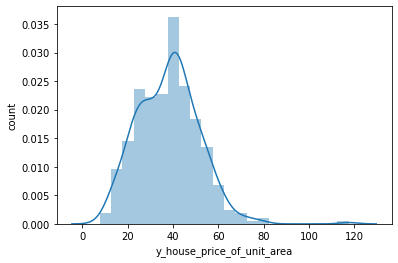

In [10]:
cols=list(df.columns)
for x in cols:
    sns.distplot(df[x])
    plt.xlabel(x)
    plt.ylabel("count")
    plt.show()

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


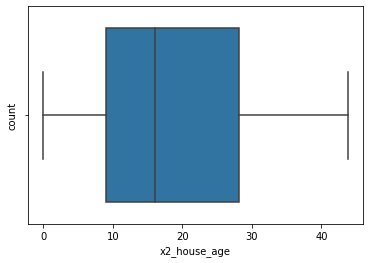

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


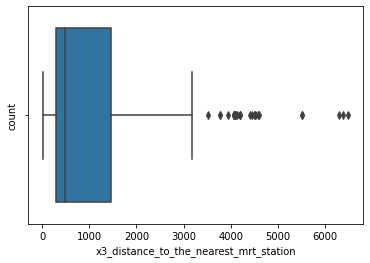

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


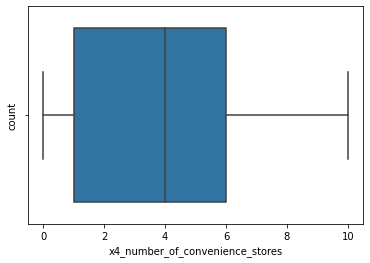

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


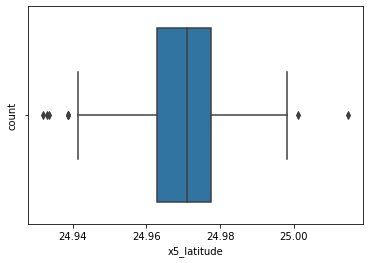

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


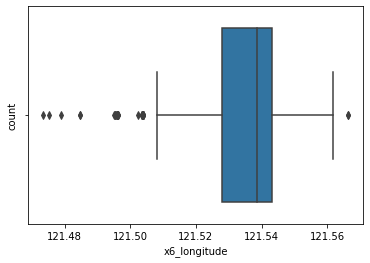

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


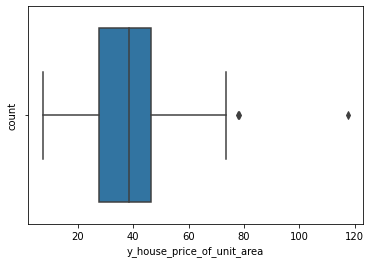

In [11]:
for x in cols:
        sns.boxplot(df[x])
        plt.xlabel(x)
        plt.ylabel("count")
        plt.show()

In [12]:
df.corr()

,x2_house_age,x3_distance_to_the_nearest_mrt_station,x4_number_of_convenience_stores,x5_latitude,x6_longitude,y_house_price_of_unit_area
x2_house_age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
x3_distance_to_the_nearest_mrt_station,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
x4_number_of_convenience_stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
x5_latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
x6_longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
y_house_price_of_unit_area,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<AxesSubplot:>

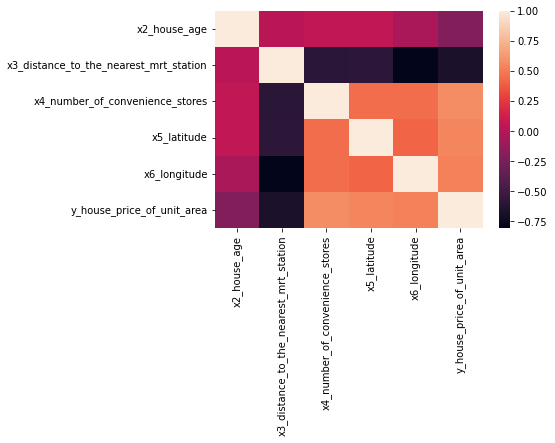

In [13]:
sns.heatmap(df.corr())

In [14]:
df1=df.drop(columns={'x5_latitude','x6_longitude'})

In [15]:
df.dtypes

x2_house_age                              float64
x3_distance_to_the_nearest_mrt_station    float64
x4_number_of_convenience_stores             int64
x5_latitude                               float64
x6_longitude                              float64
y_house_price_of_unit_area                float64
dtype: object

In [16]:
cols=df.columns
cols1=df1.columns

In [17]:
print(pd.__version__)

1.4.3


In [18]:
# pip install --upgrade pandas

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [20]:
df=(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))
df

,x2_house_age,x3_distance_to_the_nearest_mrt_station,x4_number_of_convenience_stores,x5_latitude,x6_longitude,y_house_price_of_unit_area
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
409,False,True,False,False,True,False
410,False,False,False,False,False,False
411,False,False,False,False,False,False
412,False,False,False,False,False,False


In [21]:
for col in cols:
#     print(col)
    if(df[col].dtype =='float64'):
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        IQR=q3-q1
        print(q1)
        print(q3)
        print(IQR)
        lower=q1-1.5*IQR
        upper=q3+1.5*IQR
        df = df[(df[col]< lower) & (df[col]>upper)]

In [22]:
df.dtypes

x2_house_age                              bool
x3_distance_to_the_nearest_mrt_station    bool
x4_number_of_convenience_stores           bool
x5_latitude                               bool
x6_longitude                              bool
y_house_price_of_unit_area                bool
dtype: object

In [23]:
# for colt in cols1:
#     q1=df1[colt].quantile(0.25)
#     q3=df1[colt].quantile(0.75)
#     IQR=q3-q1
#     lowert=q1-1.5*IQR
#     uppert=q3+1.5*IQR
#     df1 = df1[df1[colt]< lowert & (df1[colt]>uppert)]

In [46]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,0:5]
x1=df.iloc[:,0:3]
y=df.iloc[:,-1]
y1=df.iloc[:,-1]

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [26]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.2,random_state=40)

In [27]:

from sklearn.preprocessing import StandardScaler
#scaling the data 
sc = StandardScaler()
#model 1
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#model 2
x_train1 = sc.fit_transform(x_train1)
x_test1 = sc.transform(x_test1)


In [28]:
#model 1
y_train_arr = y_train.values
y_train = y_train_arr.reshape((-1,1))
#model 2
y_train_arr1 = y_train1.values
y_train1 = y_train_arr1.reshape((-1,1))

In [29]:
#model 1
y_train = sc.fit_transform(y_train)
#model 2
y_train1 = sc.fit_transform(y_train1)

In [30]:
# before standarsing building the model
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [31]:
model1=LinearRegression()
model1.fit(x_train1,y_train1)

LinearRegression()

In [32]:
pred=model.predict(x_test)
pred

array([[-0.14827316],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [-0.06883966],
       [ 0.01059383],
       [-0.09372245],
       [-0.06883966],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [-0.09372245],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [ 0.01059383],
       [-0.09372245],
       [ 0

In [33]:
pred1=model1.predict(x_test1)
pred1

array([[-0.09563651],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [-0.09563651],
       [ 0.00988244],
       [-0.09563651],
       [-0.09563651],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [-0.09563651],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [ 0.00988244],
       [-0.09563651],
       [ 0

In [34]:
# finding r2 scores
from sklearn.metrics import r2_score
r2=r2_score(y_test,pred)
r2

0.0

In [35]:
r2n=r2_score(y_test1,pred1)
r2n

0.0

In [36]:
# adj_r2=1-(1-r2)*len(y_train)/(len(y_train)
adj_r2 = 1 - (1 - r2 )*len(y_train)/(len(y_train)-x_train.shape[1]-1)
adj_r2


-0.01846153846153853

In [37]:
adj_r2n = 1 - (1 - r2n )*len(y_train1)/(len(y_train1)-x_train1.shape[1]-1)
adj_r2n


-0.012232415902140747

In [38]:
from sklearn.metrics import *
#rmse for model 1 - Train and test 
rmse_on_test = mean_squared_error(y_test, pred, squared=False)
rmse_on_test

0.02829621151489435

In [39]:
rmse_on_test1= mean_squared_error(y_test1, pred1, squared=False)
rmse_on_test1

0.027418679128083597

In [40]:
#mean absolute percentage error
#model 1 - train and test 
mape_on_test = mean_absolute_percentage_error(y_test, pred)
mape_on_test

75033488551252.97

In [41]:
mape_on_test1 = mean_absolute_percentage_error(y_test1, pred1)
mape_on_test1

72424764853898.75

In [42]:
# Error in prediction preparing datset
error_pred=pd.DataFrame(columns={'Actual_data','Predicted_data'})
error_pred['Actual_data']=y_test
error_pred['Predicted_data']=pred
error_pred['Error']=error_pred['Actual_data']-error_pred['Predicted_data']
error_pred.head()

,Actual_data,Predicted_data,Error
320,False,-0.148273,0.148273
383,False,0.010594,-0.010594
362,False,0.010594,-0.010594
85,False,0.010594,-0.010594
169,False,0.010594,-0.010594


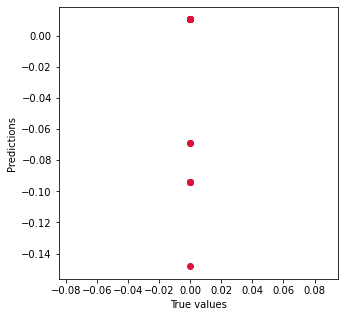

In [47]:
plt.figure(figsize=(5,5))
plt.scatter(error_pred['Actual_data'],error_pred['Predicted_data'],c='crimson')
p1=max(max(error_pred['Predicted_data']),max(error_pred['Actual_data']))
p2=max(max(error_pred['Predicted_data']),max(error_pred['Actual_data']))
plt.plot([p1,p2],[p1,p2],'-g')
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.axis("Equal")
plt.show()

In [44]:
#model 2 
error_pred2=pd.DataFrame(columns={'Actual_data','Prediction_data'})

error_pred2['Actual_data']=y_test1
error_pred2['Prediction_data']=pred1
error_pred2['Error']=error_pred2['Actual_data']-error_pred2['Prediction_data']
error_pred2.head()

,Actual_data,Prediction_data,Error
320,False,-0.095637,0.095637
383,False,0.009882,-0.009882
362,False,0.009882,-0.009882
85,False,0.009882,-0.009882
169,False,0.009882,-0.009882


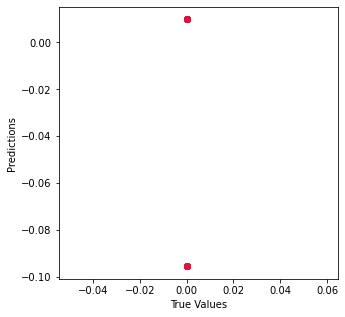

In [45]:
plt.figure(figsize=(5,5))
plt.scatter(error_pred2['Actual_data'],error_pred2['Prediction_data'],c='crimson')
p1=max(max(error_pred2['Prediction_data']),max(error_pred2['Prediction_data']))
p2=max(max(error_pred2['Prediction_data']),max(error_pred2['Prediction_data']))
plt.plot([p1, p2], [p1, p2],'-r')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.show()